In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

df_can.coulmns=list(map(str,df_can.columns))

df_can.set_index('Country',inplace=True)

df_can['Total']=df_can.sum(axis=1)

years=list(map(str,range(1980,2014)))

print('Data Dimensions:',df_can.shape)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


Data Dimensions: (195, 38)


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ',mpl.__version__)

Matplotlib version:  3.1.1


Pie Charts

In [6]:
df_continents=df_can.groupby('Continent',axis=0).sum()

df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


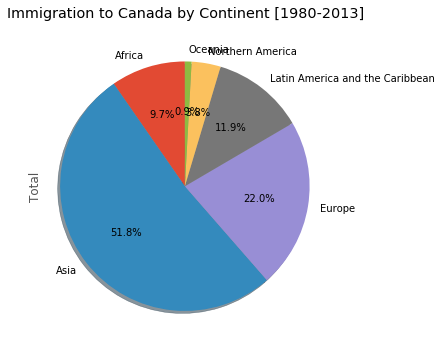

In [7]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')

plt.show()

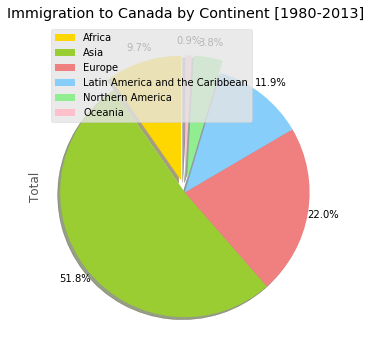

In [8]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list=[0.1,0,0,0,0.1,0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=color_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')

plt.legend(labels=df_continents.index,loc='upper left')

plt.show()

In [9]:
df_continents[2013]

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

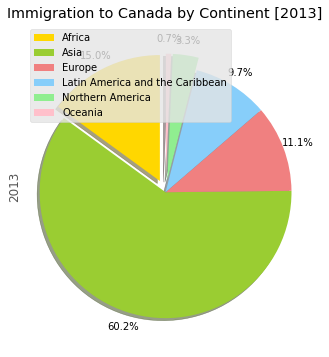

In [10]:
color_list=['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink']
explode_list=[0.1,0,0,0,0.1,0.1]

df_continents[2013].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,
                            labels=None,
                            pctdistance=1.12,
                            colors=color_list,
                            explode=explode_list
                            )

plt.title('Immigration to Canada by Continent [2013]')
plt.axis('equal')

plt.legend(labels=df_continents.index,loc='upper left')

plt.show()

Box Plot

In [19]:
years=list(map(int,years))

In [20]:
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [21]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


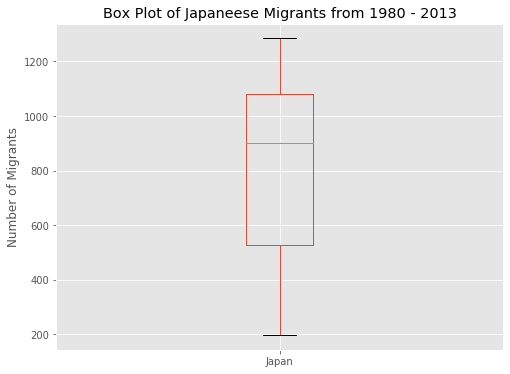

In [22]:
df_japan.plot(kind='box',figsize=(8,6))

plt.title('Box Plot of Japaneese Migrants from 1980 - 2013')
plt.ylabel('Number of Migrants')

plt.show()

In [23]:
df_CI=df_can.loc[['India','China'],years].transpose()
df_CI

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


In [24]:
df_CI.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


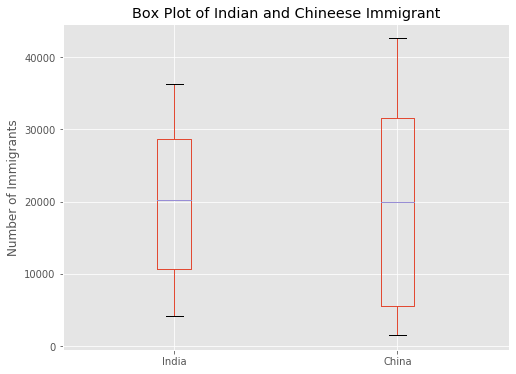

In [26]:
df_CI.plot(kind='box',figsize=(8,6))

plt.title('Box Plot of Indian and Chineese Immigrant')
plt.ylabel('Number of Immigrants')

plt.show()

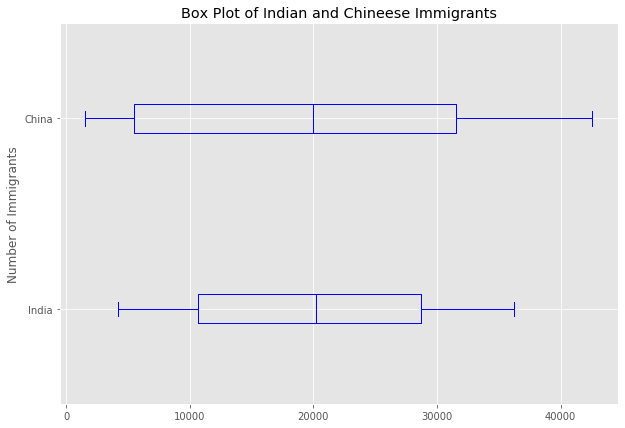

In [27]:
df_CI.plot(kind='box',figsize=(10,7),color='blue',vert=False)

plt.title('Box Plot of Indian and Chineese Immigrants')
plt.ylabel('Number of Immigrants')
plt.show()

Subplots

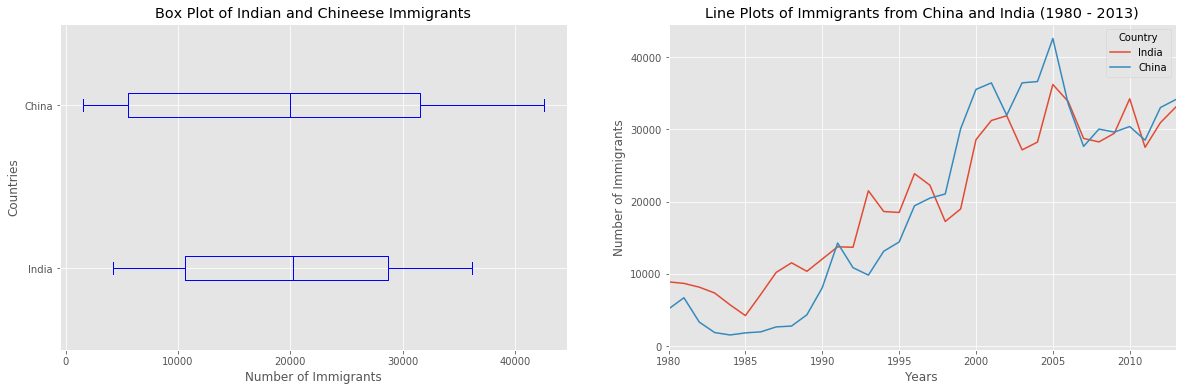

In [28]:
fig=plt.figure()

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

df_CI.plot(kind='box',color='blue',vert=False,figsize=(20,6),ax=ax0)
ax0.set_title('Box Plot of Indian and Chineese Immigrants')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line',figsize=(20,6),ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [29]:
df_can.head(15)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [32]:
df_top15=df_can.sort_values(['Total'],ascending=False,axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [35]:
years_80s=list(range(1980,1990))
years_90s=list(range(1990,2000))
years_00s=list(range(2000,2010))

df_80s=df_top15.loc[:,years_80s].sum(axis=1)
df_90s=df_top15.loc[:,years_90s].sum(axis=1)
df_00s=df_top15.loc[:,years_00s].sum(axis=1)

new_df=pd.DataFrame({'1980s':df_80s,'1990s':df_90s,'2000s':df_00s})
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [36]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


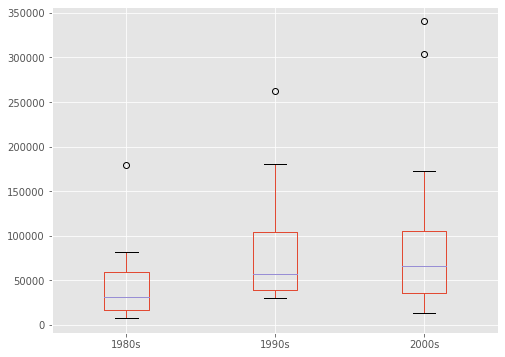

In [37]:
new_df.plot(kind='box',figsize=(8,6))
plt.show()

Scatter Plot

In [38]:
df_tot=pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index=map(int,df_tot.index)
df_tot.reset_index(inplace=True)

df_tot.columns=['year','total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


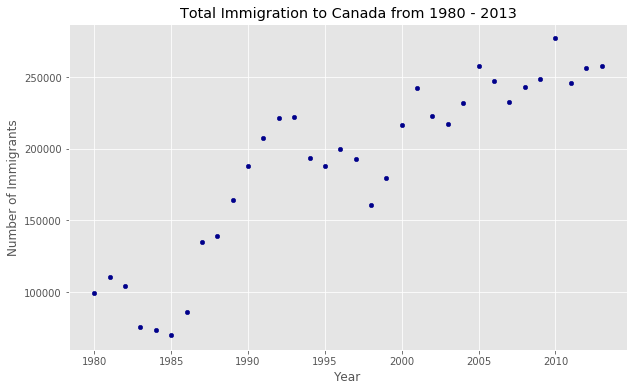

In [39]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [40]:
x=df_tot['year']
y=df_tot['total']
fit=np.polyfit(x,y,deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

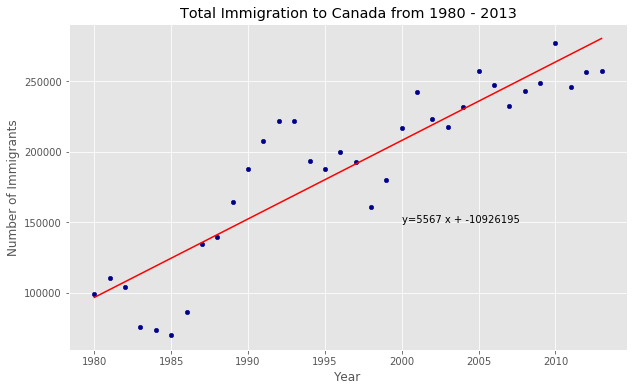

In [41]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,fit[0]*x+fit[1],color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))

plt.show()

In [42]:
df_countries=df_can.loc[['Denmark','Norway','Sweden'],years].transpose()

df_total=pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']=df_total['year'].astype(int)

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


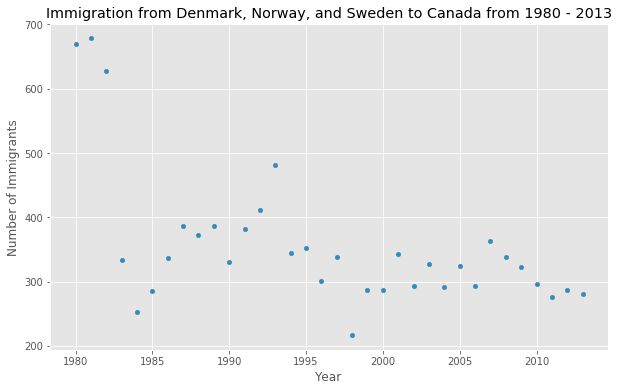

In [43]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(10,6))

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [44]:
df_can_t=df_can[years].transpose()

df_can_t.index=map(int,df_can_t.index)

df_can_t.index.name='Year'

df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [45]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

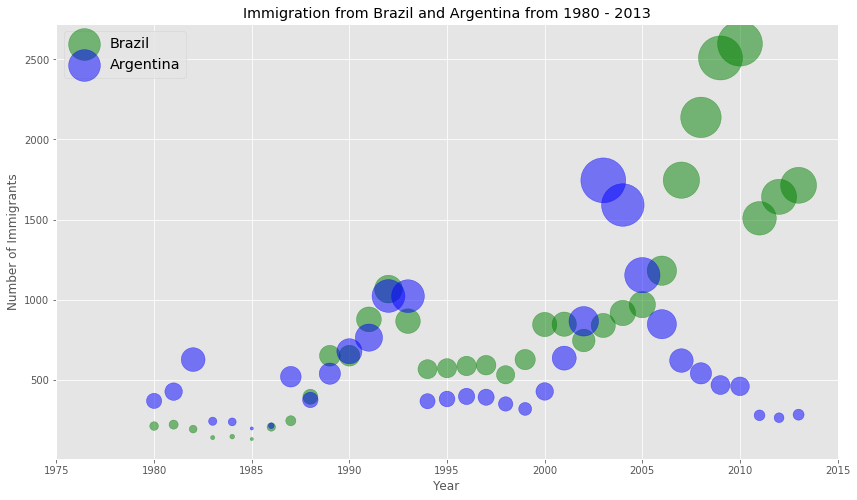

In [46]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')